# Red Wine Quality

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('./winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


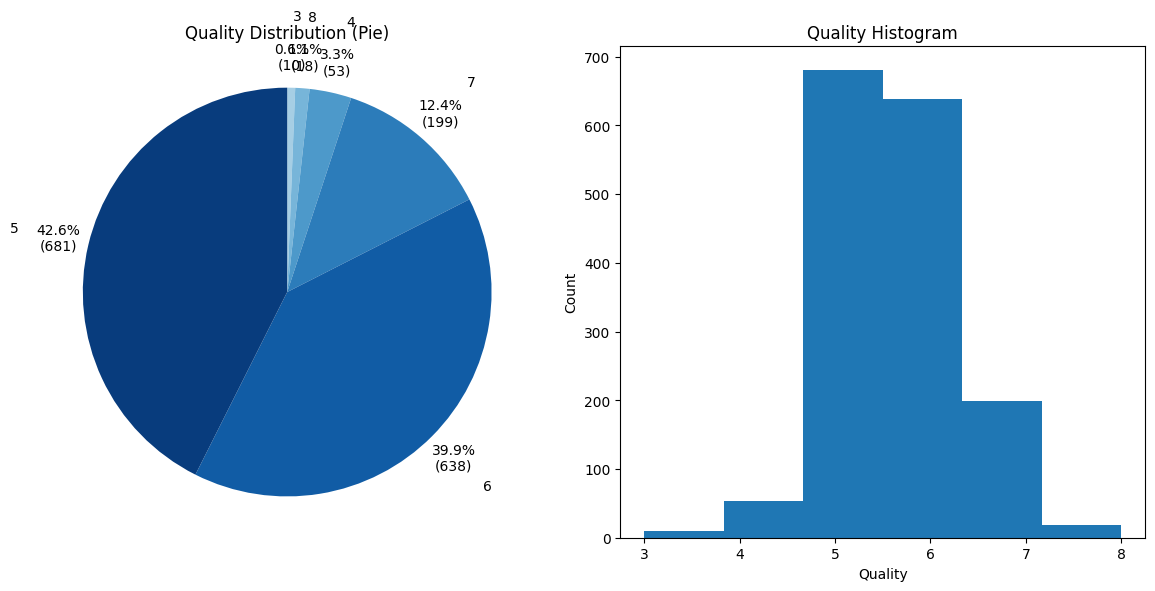

In [2]:
# 특성 살펴보기(품질 분포, 히스토그램)
# df.info()

# 분포 집계
quality_dist = df.groupby('quality').size().sort_values()

# 서브플롯
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# --- (1) 파이차트 ---
# colormap → colors 배열로 변환
cmap = plt.get_cmap('Blues')          # 네가 원한 blue 계열
colors = cmap(np.linspace(0.35, 0.95, len(quality_dist)))

axes[0].pie(
    quality_dist,
    labels=quality_dist.index,
    colors=colors,                     # 여기!
    autopct=lambda p: f'{p:.1f}%\n({p*quality_dist.sum()/100:.0f})',
    pctdistance=1.15,                  # 값/퍼센트를 바깥으로
    labeldistance=1.35,                # 라벨 더 바깥
    startangle=90,
    counterclock=False,
)
axes[0].set_title('Quality Distribution (Pie)')
axes[0].axis('equal')                  # 원형 유지

# --- (2) 히스토그램 ---
axes[1].hist(
    df['quality'],
    bins=len(quality_dist),
    color='tab:blue'
)
axes[1].set_xlabel('Quality')
axes[1].set_ylabel('Count')
axes[1].set_title('Quality Histogram')

plt.tight_layout()
plt.show()

,index,quality
0,quality,1.000000
1,alcohol,0.476166
2,sulphates,0.251397
3,citric acid,0.226373
4,fixed acidity,0.124052
5,residual sugar,0.013732
6,free sulfur dioxide,-0.050656
7,pH,-0.057731
8,chlorides,-0.128907
9,density,-0.174919


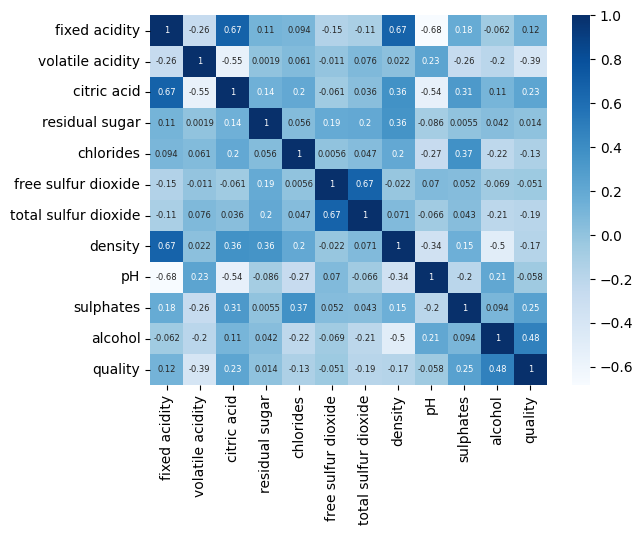

In [3]:
# 품질과의 상관관계 파악 / 품질에 영향을 많이 주는 특성 위주로.
from cProfile import label


sns.heatmap(
    df.corr(method='pearson'),
    cmap='Blues',
    annot=True,
    annot_kws={'size': 6}
    )
df.corr(method='pearson')['quality'].sort_values(ascending=False).reset_index()


In [4]:
# 추가로, 등급을 분류해보면 좋을 듯. 근데 이미 quality가 있는데요...?
# quality_labels(그룹): 0~5 -> 0 / 6 ~7 -> 1 / 8 ~ -> 2

df['quality_label'] = pd.cut(
    df['quality'],
    bins=[0, 5, 7, 10],
    labels=[0, 1, 2]
)
df.groupby('quality_label').size()

quality_label
0    744
1    837
2     18
dtype: int64

In [5]:
# 훈련 테스트 셋 나누기
from sklearn.model_selection import train_test_split
X = df.drop(columns=['quality', 'quality_label'])
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# KNN 회귀로 와인 품질 예측

# 정규화
# 스케일링

ss = StandardScaler()

ss.fit(X_train) # X_train을 기준으로 
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)
# ss.fit_transform(X_train) 이렇게 써도 됨.

for k in range(1, 30):
    kn = KNeighborsRegressor(n_neighbors=k)
    kn.fit(X_train, y_train)
    print(k, ':::',kn.score(X_train, y_train), kn.score(X_test, y_test))
    

# y_train.value_counts(normalize=True).head(1)

1 ::: 1.0 0.054306643091689866
2 ::: 0.7649031949854582 0.23819146249052792
3 ::: 0.6261111052780781 0.25233644859813087
4 ::: 0.5711135595266843 0.28466784541550894
5 ::: 0.517695914660395 0.3100479919171508
6 ::: 0.48319266974417485 0.3195812635064973
7 ::: 0.45880783568217653 0.3158445494894093
8 ::: 0.446149536580116 0.3338595604950745
9 ::: 0.43012910575846086 0.3383040361233507
10 ::: 0.42090023413794186 0.34379388734528915
11 ::: 0.4094059883188743 0.3435190036719348
12 ::: 0.40664545775892535 0.3459627852151216
13 ::: 0.402327506464778 0.3448587668573292
14 ::: 0.3991713623176977 0.3504028537406374
15 ::: 0.39356983715338656 0.3339013780135276
16 ::: 0.39391563717281053 0.32396122758272294
17 ::: 0.3900723143899958 0.3317944921605628
18 ::: 0.3893085885706514 0.33158080198578643
19 ::: 0.38788888244831565 0.33263877178755374
20 ::: 0.3855979468307381 0.3245971204849709
21 ::: 0.3833261087054015 0.32740064115230993
22 ::: 0.38243879531113245 0.3246144885906993
23 ::: 0.381149661

In [27]:
# 선형회귀로 와인품질 예측 (훈련셋-테스트셋 점수 높여보자)
# is the 직선
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
lr_basic = LinearRegression()
lr_basic.fit(X_train, y_train)
lr_basic.score(X_test, y_test)
lr_basic.predict(X_test)
print('')
# lr = LogisticRegression(max_iter=1000)

# lr.fit(X_train, y_train)
# lr.score(X_test, y_test)
# # lr.predict(X_test)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# 다항회귀는 스케일링 필수
# 나는 그냥 다 해놨음.

poly_result = []
for degree in [2, 3, 4]:
    print('\n')
    # 다항식 특성 생성
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    print(f'원래 특성 수 : {X_train.shape[1]}')
    print(f'다항식 특성 수 : {X_train_poly.shape[1]}')

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

# 성능 평가
lr_poly.score(X_test_poly, y_test) #...?(얘는 4차식)

# 2차식 만들기
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

# 성능 평가
lr_poly.score(X_test_poly, y_test) # 2차식: 0.3744541652896375




원래 특성 수 : 11
다항식 특성 수 : 77


원래 특성 수 : 11
다항식 특성 수 : 363


원래 특성 수 : 11
다항식 특성 수 : 1364


0.3744541652896375

In [33]:
# Ridge, Lasso로 규제해서 예측

from sklearn.linear_model import Ridge, Lasso

# 다항식 특성에 대해 Ridge/Lasso 적용 (앞서 만든 최적 degree 사용)
print(f"다항식 특성 (degree={best_degree}) 데이터 사용:")
print(f"특성 수: {X_train_poly_best.shape[1]}개")

# Ridge 회귀 (다항식 특성에 대해)
alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
ridge_scores_poly = []
ridge_train_scores = []

print("\nRidge 회귀 (다항식 특성):")
for alpha in alphas:
    ridge_poly = Ridge(alpha=alpha)
    ridge_poly.fit(X_train_poly_best, y_train)
    
    # 테스트 성능
    ridge_score = ridge_poly.score(X_test_poly_best, y_test)
    ridge_scores_poly.append(ridge_score)
    
    # 훈련 성능 (과적합 체크용)
    ridge_train_score = ridge_poly.score(X_train_poly_best, y_train)
    ridge_train_scores.append(ridge_train_score)
    
    print(f"  alpha={alpha:7.3f}: 테스트={ridge_score:.4f}, 훈련={ridge_train_score:.4f}, 차이={ridge_train_score-ridge_score:.4f}")

best_ridge_alpha_poly = alphas[np.argmax(ridge_scores_poly)]
best_ridge_score_poly = max(ridge_scores_poly)

# Lasso 회귀 (다항식 특성에 대해)
lasso_scores_poly = []
lasso_train_scores = []

print("\nLasso 회귀 (다항식 특성):")
for alpha in alphas:
    lasso_poly = Lasso(alpha=alpha, max_iter=2000)
    lasso_poly.fit(X_train_poly_best, y_train)
    
    # 테스트 성능
    lasso_score = lasso_poly.score(X_test_poly_best, y_test)
    lasso_scores_poly.append(lasso_score)
    
    # 훈련 성능
    lasso_train_score = lasso_poly.score(X_train_poly_best, y_train)
    lasso_train_scores.append(lasso_train_score)
    
    print(f"  alpha={alpha:7.3f}: 테스트={lasso_score:.4f}, 훈련={lasso_train_score:.4f}, 차이={lasso_train_score-lasso_score:.4f}")

best_lasso_alpha_poly = alphas[np.argmax(lasso_scores_poly)]
best_lasso_score_poly = max(lasso_scores_poly)

print(f"\n🏆 최적 성능:")
print(f"Ridge (다항식) - alpha: {best_ridge_alpha_poly}, Score: {best_ridge_score_poly:.4f}")
print(f"Lasso (다항식) - alpha: {best_lasso_alpha_poly}, Score: {best_lasso_score_poly:.4f}")

NameError: name 'best_degree' is not defined

In [ ]:
# Alpha 값에 따른 성능 비교 (훈련 vs 테스트)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(alphas, ridge_scores_poly, 'bo-', label='Ridge 테스트')
plt.plot(alphas, ridge_train_scores, 'b--', alpha=0.7, label='Ridge 훈련')
plt.xlabel('Alpha (규제 강도)')
plt.ylabel('Score (R)')
plt.title('Ridge: 규제 강도에 따른 성능')
plt.xscale('log')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(alphas, lasso_scores_poly, 'ro-', label='Lasso 테스트')
plt.plot(alphas, lasso_train_scores, 'r--', alpha=0.7, label='Lasso 훈련')
plt.xlabel('Alpha (규제 강도)')
plt.ylabel('Score (R)')
plt.title('Lasso: 규제 강도에 따른 성능')
plt.xscale('log')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(alphas, ridge_scores_poly, 'bo-', label='Ridge')
plt.plot(alphas, lasso_scores_poly, 'ro-', label='Lasso')
plt.xlabel('Alpha (규제 강도)')
plt.ylabel('Score (R)')
plt.title('Ridge vs Lasso 비교')
plt.xscale('log')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()